In [1]:
import numpy as np
import os 
import time
from scipy.signal import savgol_filter

# My custom library of photoelastic tools
import sys
sys.path.append('/eno/jdfeathe/pepe/')
#sys.path.append('/home/jack//workspaces/jupyter-workspace/pepe/')

from pepe.auto import Trial
from pepe.analysis import derivative

import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 140
plt.rcParams["font.size"] = 13

In [12]:
# Taken from SpringConstant.ipynb
# Obviously way too many sig figs, but it doesn't really matter
springConstants = {'HHH': 0.03316170112134169,
                   'MHH': 0.027379805491577477,
                   'MMH': 0.023668951584973924,
                   'MMM': 0.019776985605606933,
                   'SHH': 0.020342519852813396,
                   'MHS': 0.01647124668184871,
                   'SMM': 0.012845778674670702,
                   'SSH': 0.012311632933745764,
                   'SSM': 0.009797783579486878,
                   'SSS': 0.009347890212627422}

In [2]:
syntheticFolder = '../'
dataset = '2022-04-15_100_MHH_Gap0_0_Synthetic_0'

trial = Trial(syntheticFolder + dataset)

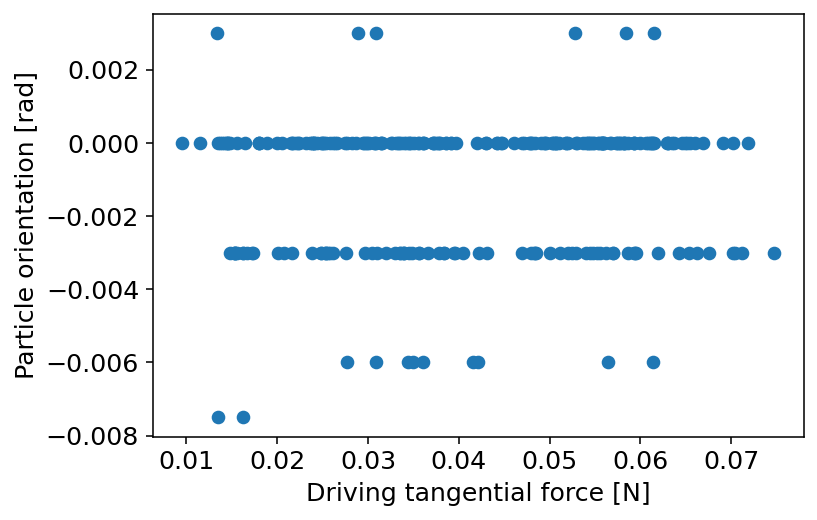

In [3]:
# Find the driving force on the central particle
particleIndex = trial.particleNear([500, 500])
forceIndex = np.argmin(np.abs(trial.averageForcePositions(particleIndex) - np.pi/2))

dTheta = trial.angleArr[particleIndex][:-1] - trial.angleArr[particleIndex][1:]
tangentialForce = trial.forceArr[particleIndex][forceIndex] * np.sin(trial.alphaArr[particleIndex][forceIndex])
plt.plot(tangentialForce[:-1], dTheta, 'o')
plt.ylabel('Particle orientation [rad]')
plt.xlabel(r'Driving tangential force [N]')

plt.show()

In [4]:
syntheticFolder = '../'
dataKey = '2022-04-15_'

fileList = os.listdir(syntheticFolder)

fileList = [f for f in fileList if dataKey in f]
#fileList = fileList[:3]

speedArr = [float(f.split('_')[1]) for f in fileList]
stiffnessArr = [f.split('_')[2] for f in fileList]

#fileList

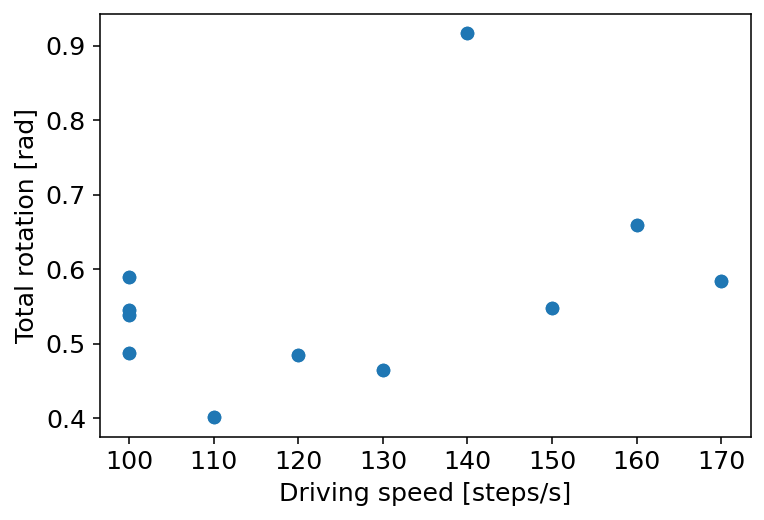

In [8]:
finalSpeedArr = []
totalRotationArr = []
for i in range(len(fileList)):
    
    if stiffnessArr[i] != 'MHH':
        continue
    
    trial = Trial(syntheticFolder + fileList[i])
    
    # Find the driving force on the central particle
    particleIndex = trial.particleNear([500, 500])
    forceIndex = np.argmin(np.abs(trial.averageForcePositions(particleIndex) - np.pi/2))

    # Sum the rotation
    dTheta = np.append(np.zeros(1), trial.angleArr[particleIndex][:-1] - trial.angleArr[particleIndex][1:])
    totalRotation = np.sum(np.abs(dTheta))
    
    finalSpeedArr.append(speedArr[i])
    totalRotationArr.append(totalRotation)

plt.plot(finalSpeedArr, totalRotationArr, 'o')
plt.ylabel('Total rotation [rad]')
plt.xlabel('Driving speed [steps/s]')
plt.show()

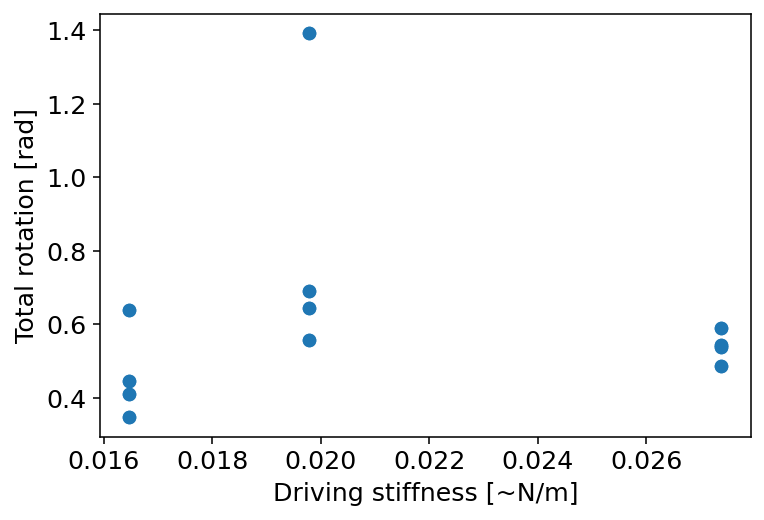

In [13]:
finalStiffnessArr = []
totalRotationArr = []

for i in range(len(fileList)):
    
    # Keep speed constant
    if speedArr[i] != 100 or 'NoAir' in fileList[i]:
        continue
    
    trial = Trial(syntheticFolder + fileList[i])
    
    # Find the driving force on the central particle
    particleIndex = trial.particleNear([500, 500])
    forceIndex = np.argmin(np.abs(trial.averageForcePositions(particleIndex) - np.pi/2))

    # Sum the rotation
    dTheta = np.append(np.zeros(1), trial.angleArr[particleIndex][:-1] - trial.angleArr[particleIndex][1:])
    totalRotation = np.sum(np.abs(dTheta))
    
    finalStiffnessArr.append(springConstants[stiffnessArr[i]])
    totalRotationArr.append(totalRotation)

plt.plot(finalStiffnessArr, totalRotationArr, 'o')
plt.ylabel('Total rotation [rad]')
plt.xlabel('Driving stiffness [~N/m]')
plt.show()

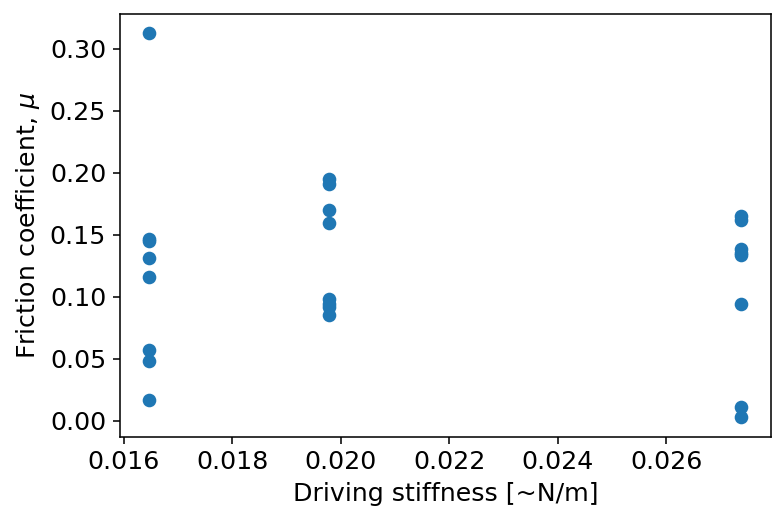

In [ ]:
finalStiffnessArr = []
frictionCoeffArr = []

for i in range(len(fileList)):
    
    # Keep speed constant
    if speedArr[i] != 100 or 'NoAir' in fileList[i]:
        continue
    
    trial = Trial(syntheticFolder + fileList[i])
    
    # Find the top and bottom forces on the central particle
    particleIndex = trial.particleNear([500, 500])
    topIndex = np.argmin(np.abs(trial.averageForcePositions(particleIndex) - np.pi))
    bottomIndex = np.argmin(np.abs(trial.averageForcePositions(particleIndex)))

    maxPoint = int((np.nanargmax(trial.forceArr[particleIndex][topIndex]) + np.nanargmax(trial.forceArr[particleIndex][bottomIndex])) / 2)
    frictionCoeff = np.abs((np.tan(trial.alphaArr[particleIndex][topIndex][maxPoint]) - np.tan(trial.alphaArr[particleIndex][bottomIndex][maxPoint])) / 2)
    # Take the point of max force
    
    finalStiffnessArr.append(springConstants[stiffnessArr[i]])
    frictionCoeffArr.append(frictionCoeff)

plt.plot(finalStiffnessArr, frictionCoeffArr, 'o')
plt.ylabel(r'Friction coefficient, $\mu$')
plt.xlabel('Driving stiffness [~N/m]')
plt.show()

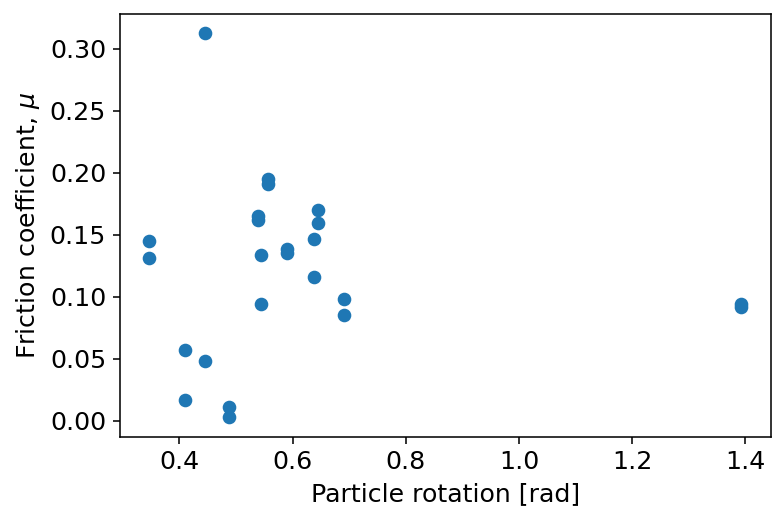

In [23]:
finalStiffnessArr = []
frictionCoeffArr = []
totalRotationArr = []

for i in range(len(fileList)):
    
    # Keep speed constant
    if speedArr[i] != 100 or 'NoAir' in fileList[i]:
        continue
    
    trial = Trial(syntheticFolder + fileList[i])
    
    # Find the top and bottom forces on the central particle
    particleIndex = trial.particleNear([500, 500])
    topIndex = np.argmin(np.abs(trial.averageForcePositions(particleIndex) - np.pi))
    bottomIndex = np.argmin(np.abs(trial.averageForcePositions(particleIndex)))

    # Find point of max force, and take ratio of tangential to normal there
    maxPoint = int((np.nanargmax(trial.forceArr[particleIndex][topIndex]) + np.nanargmax(trial.forceArr[particleIndex][bottomIndex])) / 2)
    frictionCoeff = np.abs((np.tan(trial.alphaArr[particleIndex][topIndex][maxPoint]) - np.tan(trial.alphaArr[particleIndex][bottomIndex][maxPoint])) / 2)    
    
    # Sum the rotation
    dTheta = np.append(np.zeros(1), trial.angleArr[particleIndex][:-1] - trial.angleArr[particleIndex][1:])
    totalRotation = np.sum(np.abs(dTheta))
    
    totalRotationArr.append(totalRotation)
    finalStiffnessArr.append(springConstants[stiffnessArr[i]])
    frictionCoeffArr.append(frictionCoeff)

plt.plot(totalRotationArr, frictionCoeffArr, 'o')
plt.ylabel(r'Friction coefficient, $\mu$')
plt.xlabel('Particle rotation [rad]')
plt.show()